In [25]:
#import the libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
#load the training dataset
train_data = pd.read_csv("/content/Google_Stock_Price_Train.csv")
train_data

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [27]:
#Use the Open Stock Price Column to Train Your Model.
training_set = train_data.iloc[:,1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [28]:
training_set.shape

(1258, 1)

In [29]:
#Normalizing the Dataset.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
scaled_training_set = scaler.fit_transform(training_set)

scaled_training_set

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [30]:
#Creating X_train and y_train Data Structures
X_train = []
Y_train = []
for i in range(60,1258):
  X_train.append(scaled_training_set[i-60:i, 0])
  Y_train.append(scaled_training_set[i, 0])
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [31]:
 X_train.shape

(1198, 60)

In [32]:
Y_train.shape

(1198,)

In [33]:
#Reshape the Data
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1198, 60, 1)

In [34]:
#Building the Model by Importing the Crucial Libraries and Adding Different Layers to LSTM
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [35]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [36]:
#Fitting the Model
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, Y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 13s 109ms/step - loss: 0.0458
Epoch 2/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0064
Epoch 3/100
38/38 [==============================] - 5s 143ms/step - loss: 0.0062
Epoch 4/100
38/38 [==============================] - 4s 106ms/step - loss: 0.0055
Epoch 5/100
38/38 [==============================] - 4s 108ms/step - loss: 0.0048
Epoch 6/100
38/38 [==============================] - 5s 142ms/step - loss: 0.0046
Epoch 7/100
38/38 [==============================] - 4s 118ms/step - loss: 0.0044
Epoch 8/100
38/38 [==============================] - 4s 108ms/step - loss: 0.0041
Epoch 9/100
38/38 [==============================] - 5s 140ms/step - loss: 0.0053
Epoch 10/100
38/38 [==============================] - 4s 109ms/step - loss: 0.0044
Epoch 11/100
38/38 [==============================] - 5s 124ms/step - loss: 0.0043
Epoch 12/100
38/38 [==============================] - 5s 123ms/step - loss: 0.0035
Epoch 13/100

In [37]:
#Extracting the Actual Stock Prices of Jan-2017
test_data = pd.read_csv('/content/Google_Stock_Price_Test.csv')
actual_stock_price = test_data.iloc[:,1:2].values

In [38]:
#Preparing the Input for the Model
dataset_total = pd.concat((train_data['Open'], test_data['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test_data) - 60:].values

inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(60, 80):
  X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))

In [39]:
#Predicting the Values for Jan 2017 Stock Prices
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

1/1 [==============================] - 1s 1s/step


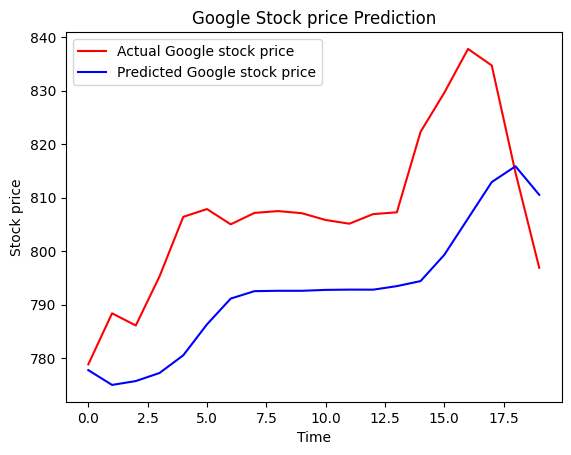

In [40]:
#Plotting the Actual and Predicted Prices for Google Stocks
plt.plot(actual_stock_price, color = 'red', label = 'Actual Google stock price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google stock price')
plt.title('Google Stock price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock price')
plt.legend()
plt.show()